<a href="https://colab.research.google.com/github/tomasrodriguezr11/Programacion-MIAAD/blob/main/ProyectoProgADAP_266228.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyecto de Programación para Analítica Descriptiva y Predictiva**

**Nombre del Proyecto: Predicción del contenido de Clorofila-a en el Lago Laguna a partir de las concentraciones de Nitrógeno y Fósforo**

Grupo: A

Autor: Tomás Eduardo Rodríguez Ramírez

Matrícula: 266228

Fecha: 18 de febrero de 2026

# **Etapa 1: Análisis Descriptivo**

#Análisis de estructura

In [ ]:
#Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Carga del dataset
dataset="drive/MyDrive/ProgramacionMIAAD/chlor.csv"
df = pd.read_csv(dataset, skipfooter=1, engine='python')
df

,Chl_a,Phy,NO2,NO3,NH4,PO4,Site,Bay,Depth
0,6.66,0.74,0.21830,0.522735,31.784807,15.317651,XVI,West Bay,1.097
1,6.45,0.78,0.21830,0.522735,31.784807,15.317651,XVI,West Bay,1.098
2,6.27,0.77,0.21830,0.522735,31.784807,15.317651,XVI,West Bay,1.098
3,6.13,0.58,0.21495,0.527931,30.446107,14.834307,XVI,West Bay,2.004
4,6.10,0.57,0.21495,0.527931,30.446107,14.834307,XVI,West Bay,2.004
...,...,...,...,...,...,...,...,...,...
249,5.64,0.62,0.21221,0.634104,31.311913,15.862311,VIII,South Bay,3.002
250,5.79,0.57,0.21221,0.634104,31.311913,15.862311,VIII,South Bay,3.003
251,5.26,0.55,0.21221,0.634104,31.311913,15.862311,VIII,South Bay,3.004
252,5.77,0.52,0.21221,0.634104,31.311913,15.862311,VIII,South Bay,3.007


In [ ]:
# Dimensiones del dataset
df.shape

(254, 9)

In [ ]:
# Nombre de las columnas del dataset
df.columns

Index(['Chl_a', 'Phy', 'NO2', 'NO3', 'NH4', 'PO4', 'Site', 'Bay', 'Depth'], dtype='object')

In [ ]:
# Tipos de datos e identificación de variables numéricas y categóricas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Chl_a   254 non-null    float64
 1   Phy     254 non-null    float64
 2   NO2     109 non-null    float64
 3   NO3     109 non-null    float64
 4   NH4     109 non-null    float64
 5   PO4     109 non-null    float64
 6   Site    254 non-null    object 
 7   Bay     254 non-null    object 
 8   Depth   254 non-null    float64
dtypes: float64(7), object(2)
memory usage: 18.0+ KB


In [ ]:
# Cantidad de valores faltantes por columna
df.isnull().sum()

,0
Chl_a,0
Phy,0
NO2,145
NO3,145
NH4,145
PO4,145
Site,0
Bay,0
Depth,0


In [ ]:
# Eliminación de filas con valores faltantes
df = df.dropna()
df.isnull().sum()
df

,Chl_a,Phy,NO2,NO3,NH4,PO4,Site,Bay,Depth
0,6.66,0.74,0.21830,0.522735,31.784807,15.317651,XVI,West Bay,1.097
1,6.45,0.78,0.21830,0.522735,31.784807,15.317651,XVI,West Bay,1.098
2,6.27,0.77,0.21830,0.522735,31.784807,15.317651,XVI,West Bay,1.098
3,6.13,0.58,0.21495,0.527931,30.446107,14.834307,XVI,West Bay,2.004
4,6.10,0.57,0.21495,0.527931,30.446107,14.834307,XVI,West Bay,2.004
...,...,...,...,...,...,...,...,...,...
249,5.64,0.62,0.21221,0.634104,31.311913,15.862311,VIII,South Bay,3.002
250,5.79,0.57,0.21221,0.634104,31.311913,15.862311,VIII,South Bay,3.003
251,5.26,0.55,0.21221,0.634104,31.311913,15.862311,VIII,South Bay,3.004
252,5.77,0.52,0.21221,0.634104,31.311913,15.862311,VIII,South Bay,3.007


# Estadística descriptiva

In [ ]:
# Creación de nuevas variables TN y TP

# Nitrógeno Total (TN)
df['TN'] = df['NO2'] + df['NO3']

# Fósforo Total (TP)
df['TP'] = df['PO4']

# Creación de nuevo dataframe solo con las 3 variables para el análisis
df_model = df[['Chl_a', 'TN', 'TP']]

df_model

/tmp/ipython-input-1564681736.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TN'] = df['NO2'] + df['NO3']
/tmp/ipython-input-1564681736.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TP'] = df['PO4']


,Chl_a,TN,TP
0,6.66,0.741035,15.317651
1,6.45,0.741035,15.317651
2,6.27,0.741035,15.317651
3,6.13,0.742881,14.834307
4,6.10,0.742881,14.834307
...,...,...,...
249,5.64,0.846314,15.862311
250,5.79,0.846314,15.862311
251,5.26,0.846314,15.862311
252,5.77,0.846314,15.862311


In [ ]:
# Resumen estadístico para las variables numéricas
df_model.describe()

,Chl_a,TN,TP
count,109.000000,109.000000,109.000000
mean,6.388532,0.806827,14.847927
std,1.347983,0.094654,3.030103
min,2.430000,0.599994,4.741473
25%,5.530000,0.741035,15.074675
50%,6.100000,0.846314,15.663037
75%,7.170000,0.870732,15.877313
max,10.460000,0.942598,17.424538


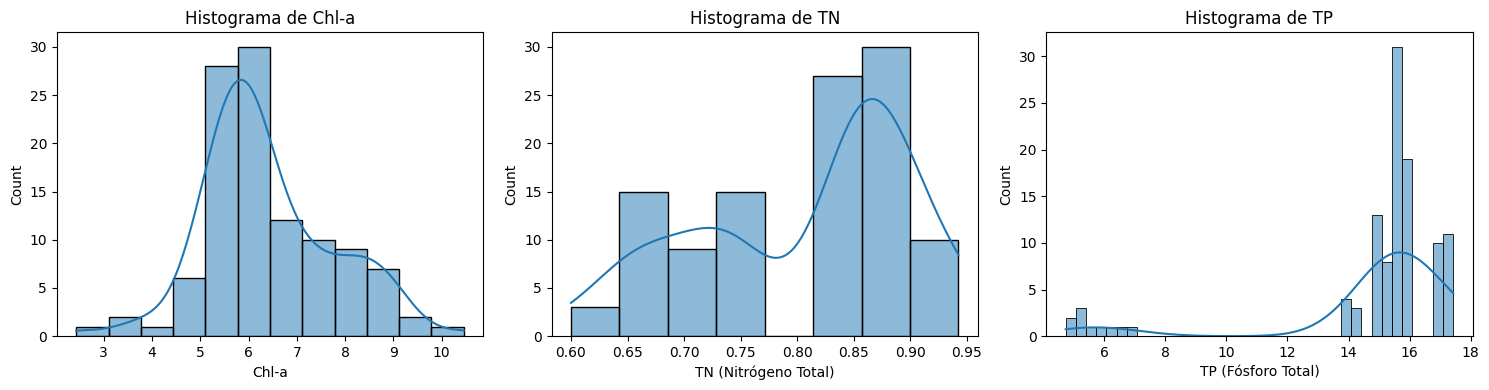

In [ ]:
# Histograma de las variables Chl-a, TN y TP
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Histograma para Chl-a
sns.histplot(df_model['Chl_a'], kde=True, ax=axes[0])
axes[0].set_title('Histograma de Chl-a')
axes[0].set_xlabel('Chl-a')

# Histograma para TN
sns.histplot(df_model['TN'], kde=True, ax=axes[1])
axes[1].set_title('Histograma de TN')
axes[1].set_xlabel('TN (Nitrógeno Total)')

# Histograma para TP
sns.histplot(df_model['TP'], kde=True, ax=axes[2])
axes[2].set_title('Histograma de TP')
axes[2].set_xlabel('TP (Fósforo Total)')

plt.tight_layout()
plt.show()

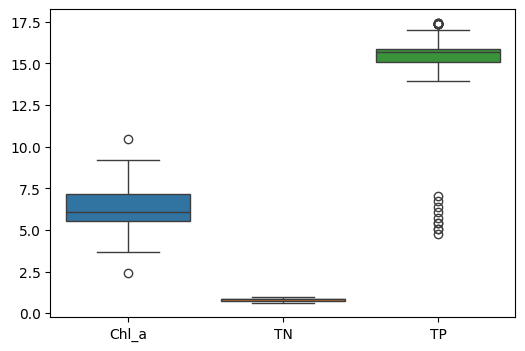

In [ ]:
# Gráfico de cajas para las variables Chl_a, TN, TP
plt.figure(figsize=(6,4))
sns.boxplot(data=df_model)
plt.show()

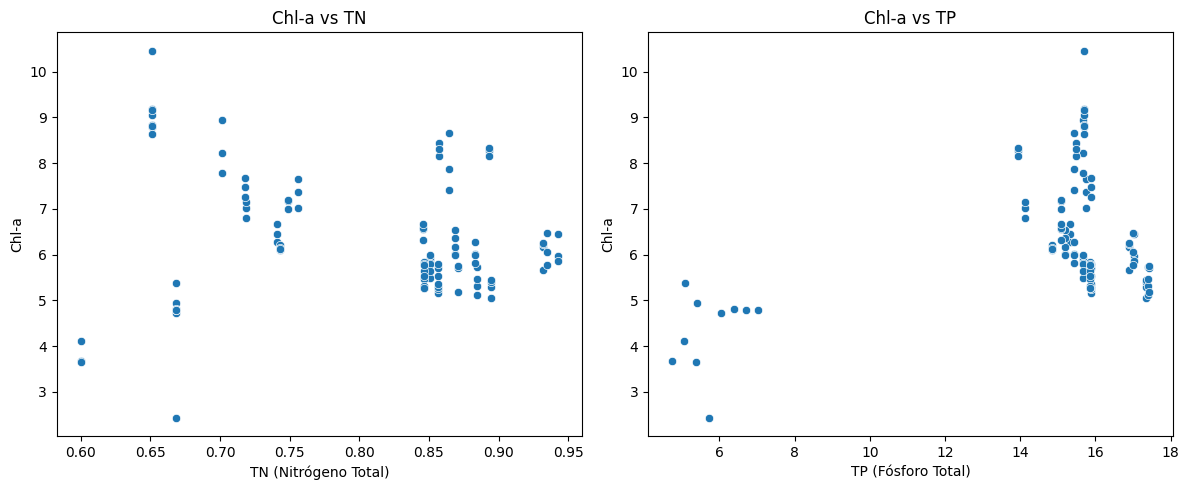

In [ ]:
# Gráficos de dispersión
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Chl-a vs TN
sns.scatterplot(x=df_model['TN'], y=df_model['Chl_a'], ax=axes[0])
axes[0].set_title('Chl-a vs TN')
axes[0].set_xlabel('TN (Nitrógeno Total)')
axes[0].set_ylabel('Chl-a')

# Chl-a vs TP
sns.scatterplot(x=df_model['TP'], y=df_model['Chl_a'], ax=axes[1])
axes[1].set_title('Chl-a vs TP')
axes[1].set_xlabel('TP (Fósforo Total)')
axes[1].set_ylabel('Chl-a')

plt.tight_layout()
plt.show()